In [53]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from random import choice

def generate_forest_graph(size, structure, tree_prob):
    G = nx.Graph()

    if structure == 'rectangular':
        for i in range(size):
            for j in range(size):
                    G.add_node((i, j))

        for i in range(size):
            for j in range(size):
                if (i + 1, j) in G.nodes and np.random.rand() < tree_prob:
                    G.add_edge((i, j), (i + 1, j))
                if (i, j + 1) in G.nodes and np.random.rand() < tree_prob:
                    G.add_edge((i, j), (i, j + 1))

    elif structure == 'hexagonal':
        for i in range(size):
            for j in range(size):
                if np.random.rand() < tree_prob:
                    G.add_node((i, j))

                    # Connect horizontally and vertically
                    if (i - 1, j) in G.nodes:
                        G.add_edge((i, j), (i - 1, j))
                    if (i, j - 1) in G.nodes:
                        G.add_edge((i, j), (i, j - 1))

                    # Connect diagonally based on row parity
                    if i % 2 == 0:
                        if (i - 1, j - 1) in G.nodes:
                            G.add_edge((i, j), (i - 1, j - 1))
                        if (i + 1, j - 1) in G.nodes:
                            G.add_edge((i, j), (i + 1, j - 1))
                    else:
                        if (i - 1, j + 1) in G.nodes:
                            G.add_edge((i, j), (i - 1, j + 1))
                        if (i + 1, j + 1) in G.nodes:
                            G.add_edge((i, j), (i + 1, j + 1))


    else:
        raise ValueError("Invalid structure type. Use 'rectangular' or 'hexagonal'.")
    
    for i in range(size):
        for j in range(size):
            if np.random.rand() > tree_prob and (i, j) in G.nodes:
                G.remove_node((i, j))

    return G


def visualize_forest_graph(G, title=None):
    pos = {node: (node[1], -node[0]) for node in G.nodes}
    nx.draw(G, pos, node_color='green')
    plt.title(title)
    plt.show()

def visualize_burnt_forest(G, ignition_point, burnt_nodes, title=None, visualise=False):
    plt.figure(figsize=(10, 10))  
    
    pos = {node: (node[1], -node[0]) for node in G.nodes}  # Flip the y-axis for better visualization
    node_colors = ['black' if node == ignition_point else 'red' if node in burnt_nodes else 'green' for node in G.nodes]
    nx.draw(G, pos, node_color=node_colors, node_size = 30)
    if title:
        plt.title(title)
        
    plt.margins(0, 0)

    
    if visualise:
        plt.show()  # Set an empty string as the title
    return plt

def spread_fire_graph(G, ignition_point, fire_prob):
    burned_nodes = set()
    burning_nodes = {ignition_point}
    steps = 0
    
    while burning_nodes:
        steps += 1
        new_burning_nodes = set()
        for node in burning_nodes:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in burned_nodes and np.random.rand() < fire_prob:
                    new_burning_nodes.add(neighbor)
                    burned_nodes.add(neighbor)

        burning_nodes = new_burning_nodes

    return burned_nodes, steps

def simulate_forest_fire_graph(size, structure, tree_prob, fire_prob, num_simulations, visualise=False):
    steps_to_extinguish = []
    percent_burnt_down = []

    for _ in range(num_simulations):
        G = generate_forest_graph(size, structure, tree_prob)
        # Uncomment the line below to visualize each forest
        # if visualise:
        #     visualize_forest_graph(G,structure)

        ignition_point = choice(list(G.nodes()))
        if ignition_point in G.nodes:
            burned_nodes, steps = spread_fire_graph(G, ignition_point, fire_prob)

            steps_to_extinguish.append(steps)

            percent_burnt = len(burned_nodes) / len(G.nodes)
            percent_burnt_down.append(percent_burnt)

            # Uncomment the line below to visualize each burnt forest
            burned_plot = visualize_burnt_forest(G, ignition_point, burned_nodes,visualise=visualise)
            

    avg_steps = np.mean(steps_to_extinguish)
    avg_percent_burnt = np.mean(percent_burnt_down)

    return avg_steps, avg_percent_burnt

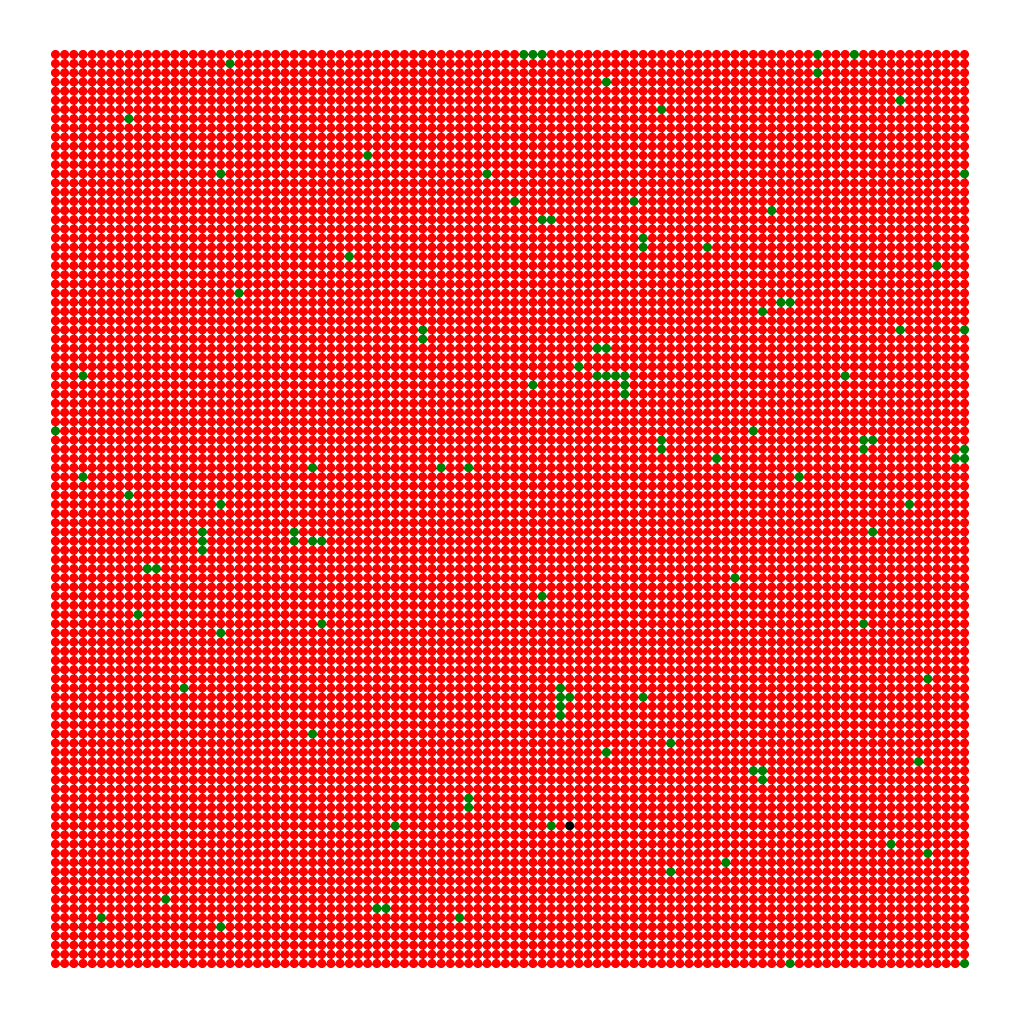

Average steps to extinguish fire: 143.0
Average percentage of forest burnt down: 0.9889


In [54]:
# Parameters
forest_size = 100
# forest_structure = 'rectangular'  # or 'rectangular'
forest_structure = 'rectangular'
tree_probability = 1
fire_spread_probability = 0.7
num_simulations = 1

# Run simulations
avg_steps, avg_percent_burnt = simulate_forest_fire_graph(forest_size, forest_structure, tree_probability,
                                                          fire_spread_probability, num_simulations, True)

# Display results
print(f"Average steps to extinguish fire: {avg_steps}")
print(f"Average percentage of forest burnt down: {avg_percent_burnt}")